<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_9_Unsupervised_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Modelling: Machine Learning**
## Unsupervised Methods

## Problem Statement

Unsupervised clustering methods will be analyzed in this notebook using generated dataset

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import plotly.express as px
%matplotlib inline

### Generate data 
Lets generate data using `make_blobs` function from `sklearn` library

In [ ]:
centers = [[1, 1,0], [-1, -1, 1], [1, -1, -1]]
df, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.7, n_features=3, random_state=0)

In [ ]:
df=pd.DataFrame(df)
df.head()

,0,1,2
0,-0.208398,1.124198,-0.281247
1,0.627604,-1.669381,-0.883896
2,-0.492942,-0.030317,0.787831
3,-1.117750,-0.735463,1.927051
4,1.475982,0.512571,-0.203278


Scale the data to avoid unbalanced weights for attributes

In [ ]:
scaler = StandardScaler() #MinMaxScaler() is another option
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()

,0,1,2
0,-0.464361,1.271132,-0.245771
1,0.252214,-1.130895,-0.812259
2,-0.708256,0.278435,0.759159
3,-1.243807,-0.327877,1.830022
4,0.979397,0.745231,-0.172480


Take a look at data before applying any clustering algorithm

In [ ]:
fig = px.scatter_3d(df_scaled, x=0, y=1, z=2,  title="Data Before Clustering")
fig.update_traces(marker_size = 1)
fig.show()

K-Means Algorithm

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.predict(df_scaled) #label the data according to the cluster they belong
centroids = kmeans.cluster_centers_ #centroids of the clusters

In [ ]:
colmap = {1: 'r', 2: 'g', 3: 'b', 4:'m'}
colors = list(map(lambda x: colmap[x+1], labels))
df_scaled['Colors'] = colors
fig = px.scatter_3d(df_scaled, x=0, y=1, z=2, color='Colors',  title="K-Means Clustering", color_discrete_map={
                "r": "red",
                "g": "green",
                "b": "blue",
                "m": "magenta"})

df_scaled=df_scaled.drop(['Colors'],axis=1)
fig.update_traces(marker_size = 1)
fig.show()

In [ ]:
colmap

{1: 'r', 2: 'g', 3: 'b', 4: 'm'}

In [ ]:
#Plot centroids
cent=pd.DataFrame(centroids)
labels_cent = kmeans.predict(cent)
colors_cent = list(map(lambda x: colmap[x+1], labels_cent))
cent['Colors'] = colors_cent
cent

,0,1,2,Colors
0,-1.171527,-0.489047,1.021874,r
1,0.561314,1.197356,-0.103543,g
2,0.651076,-0.466002,-1.330203,b
3,0.478966,-0.856787,-0.255260,m


In [ ]:
import plotly.graph_objects as go

fig.add_trace(
    go.Scatter3d(x=cent[0],
                 y=cent[1],
                 z=cent[2],
                 mode='markers',
                 marker=dict(size=3, color=["red","green","blue","magenta"]))
    )

Elbow method is used to find the optimum number of clusters according to within sum square methods

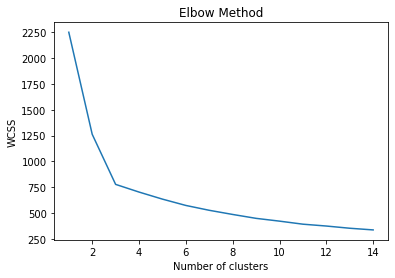

In [ ]:
#Elbow Method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhoutte coefficient is another performance criteria to evaluate the performance of the clustering algorithm. The higher score is the better

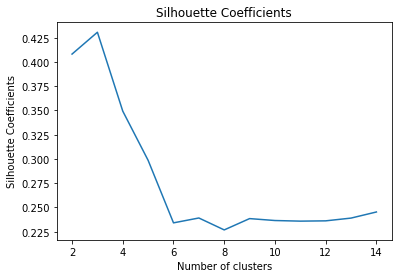

In [ ]:
#Silhouette Coefficients
silhouette_coefficients = []
for i in range(2, 15):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(df_scaled)
  score = silhouette_score(df_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(2, 15),silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficients')
plt.show()

#It seems that having 3 clusters gives the best solution

DBSCAN

In DBSCAN algorithm we need to specify `eps` which can be calculated heuristicly using nearest neighbor algorithm. DBSCAN algorithm is a non-parametric method which automatically decides number of clusters

Text(0, 0.5, 'eps')

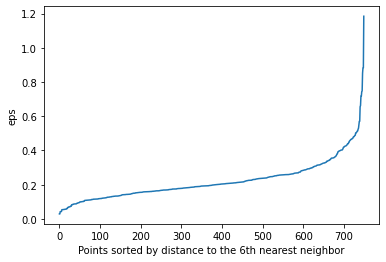

In [ ]:
#To specify eps parameter:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Points sorted by distance to the 6th nearest neighbor')
plt.ylabel('eps')

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db=DBSCAN(eps=0.4, min_samples=6).fit(df_scaled)  
labels_db=db.labels_

In [ ]:
core_samples_mask = np.zeros_like(labels_db, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0) # Number of clusters in labels after removing points that are considered as noise.
n_noise_ = list(labels_db).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_db))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_db))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_db))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels_db))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels_db))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_scaled, labels_db))



Estimated number of clusters: 2
Estimated number of noise points: 162
Homogeneity: 0.416
Completeness: 0.445
V-measure: 0.430
Adjusted Rand Index: 0.379
Adjusted Mutual Information: 0.429
Silhouette Coefficient: 0.250


In [ ]:
colmap = {0: 'bl', 1: 'r', 2: 'g', 3: 'b', 4:'m', 5:'y'}
colors_db = list(map(lambda x: colmap[x+1], labels_db))
df_scaled['Colors_DB'] = colors_db
fig = px.scatter_3d(df_scaled, x=0, y=1, z=2, color='Colors_DB',  title="DBSCAN Clustering", color_discrete_map={
                "r": "red",
                "g": "green",
                "b": "blue",
                "m": "magenta",
                "bl": "black",
                "y": "yellow"})
df_scaled=df_scaled.drop(['Colors_DB'],axis=1)
fig.update_traces(marker_size = 1)
fig.show()

#black points are noise

Mean Shift Clustering Algorithm

In [ ]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(df_scaled)

MeanShift()

In [ ]:
labels_ms = ms.predict(df_scaled)
centroids_ms = ms.cluster_centers_

In [ ]:
colors_ms = list(map(lambda x: colmap[x+1], labels_ms))
df_scaled['Colors_MS'] = colors_ms
fig = px.scatter_3d(df_scaled, x=0, y=1, z=2, color='Colors_MS',  title="Mean Shift Clustering", color_discrete_map={
                "r": "red",
                "g": "green",
                "b": "blue",
                "m": "magenta"})
df_scaled=df_scaled.drop(['Colors_MS'],axis=1)
fig.update_traces(marker_size = 1)
fig.show()


Gaussian Mixtures

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(df_scaled)
labels_gmm = gmm.predict(df_scaled)

In [ ]:
colors_gmm = list(map(lambda x: colmap[x+1], labels_gmm))
df_scaled['Colors_GMM'] = colors_gmm
fig = px.scatter_3d(df_scaled, x=0, y=1, z=2, color='Colors_GMM',  title="Gaussian Mixture Clustering", color_discrete_map={
                "r": "red",
                "g": "green",
                "b": "blue",
                "m": "magenta",
                "bl": "black",
                "y": "yellow"})
df_scaled=df_scaled.drop(['Colors_GMM'],axis=1)
fig.update_traces(marker_size = 1)
fig.show()


Hierarchical Clustering

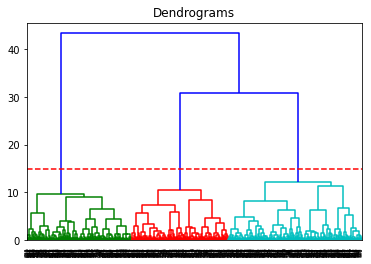

In [ ]:
import scipy.cluster.hierarchy as shc
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward')) #Agglomerative Clustering supports Ward, single, average, and complete linkage strategies. So you can change method as you wish.
plt.axhline(y=15, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ag_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')   #Agglomerative Clustering supports Ward, single, average, and complete linkage strategies.
clusters = ag_cluster.fit_predict(df_scaled)
colors_agclusters = list(map(lambda x: colmap[x+1], clusters))

df_scaled['colors_agclusters'] = colors_agclusters
fig = px.scatter_3d(df_scaled, x=0, y=1, z=2, color='colors_agclusters',  title="Agglomerative Clustering", color_discrete_map={
                "r": "red",
                "g": "green",
                "b": "blue",
                "m": "magenta",
                "bl": "black",
                "y": "yellow"})

fig.update_traces(marker_size = 1)
fig.show()
